In [2]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from dateutil.relativedelta import relativedelta
from dateutil import parser as ps


# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect,text


In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [12]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [13]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [14]:
inspector.get_table_names()

['measurement', 'station']

In [15]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
# Latest Date
last=session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

oneyerago=ps.parse(last).date()-relativedelta(months=+12)
oneyerago=str(oneyerago)
oneyerago


'2016-08-23'

In [17]:
qry = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= oneyerago).filter(Measurement.date <= last).\
group_by(Measurement.date).\
order_by(Measurement.date.desc()).all()
qry 

[('2017-08-23', 0.45),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.56),
 ('2017-08-20', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', None),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.22),
 ('2017-08-13', None),
 ('2017-08-12', 0.14),
 ('2017-08-11', None),
 ('2017-08-10', 0.07),
 ('2017-08-09', 0.15),
 ('2017-08-08', 0.34),
 ('2017-08-07', 0.05),
 ('2017-08-06', None),
 ('2017-08-05', None),
 ('2017-08-04', 0.0),
 ('2017-08-03', 0.06),
 ('2017-08-02', 0.25),
 ('2017-08-01', None),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.3),
 ('2017-07-29', 0.3),
 ('2017-07-28', 0.4),
 ('2017-07-27', 0.0),
 ('2017-07-26', 0.3),
 ('2017-07-25', 0.3),
 ('2017-07-24', 0.84),
 ('2017-07-23', 0.8),
 ('2017-07-22', 4.0),
 ('2017-07-21', 0.1),
 ('2017-07-20', 0.7),
 ('2017-07-19', 0.27),
 ('2017-07-18', 2.4),
 ('2017-07-17', 0.39),
 ('2017-07-16', 0.5),
 ('2017-07-15', 0.1),
 ('2017-07-14', 0.68),
 ('2017-07-13', 0.68),
 ('2017-07-12', 0.05),
 ('2017-07-11', 0.0),
 ('20

<IPython.core.display.Javascript object>


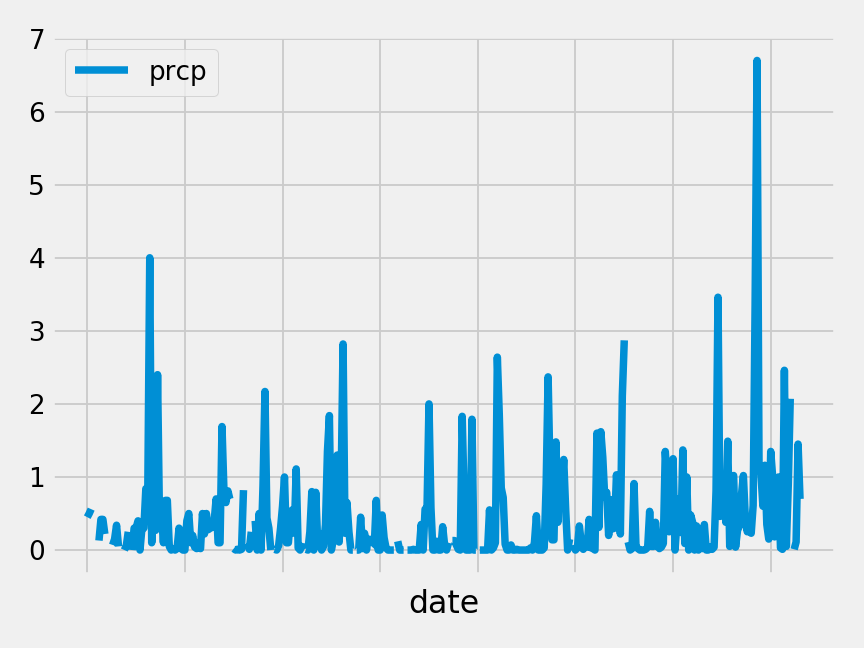

In [18]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(qry, columns=['date', 'prcp'])
df=df.sort_values(by='date',ascending=False)
df.set_index('date', inplace=True)
df.plot.line()
plt.tight_layout()
plt.xticks(rotation=70)
plt.show()


# Exploratory Climate Analysis

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Latest Date

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


In [20]:
df.describe()

,prcp
count,345.000000
mean,0.432087
std,0.704363
min,0.000000
25%,0.010000
50%,0.140000
75%,0.580000
max,6.700000


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [22]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
session.query(Station.id,Station.station,Station.name).all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US'),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (4, 'USC00517948', 'PEARL CITY, HI US'),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US'),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [24]:
# How many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [25]:
# What are the most active stations?
# List the stations and the counts in descending order.

query = session.query(
    Measurement.station,
    func.count(Measurement.tobs)
).group_by(Measurement.station).\
order_by( func.count(Measurement.tobs).desc()).all()


query 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
query3 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
group_by(Measurement.station).\
order_by( func.count(Measurement.tobs).desc()).first()


query3

(54.0, 85.0, 71.66378066378067)

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
qry1 = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station=='USC00519281').\
filter(Measurement.date>oneyerago).\
order_by(Measurement.date.desc()).all()
qry1


[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

<IPython.core.display.Javascript object>


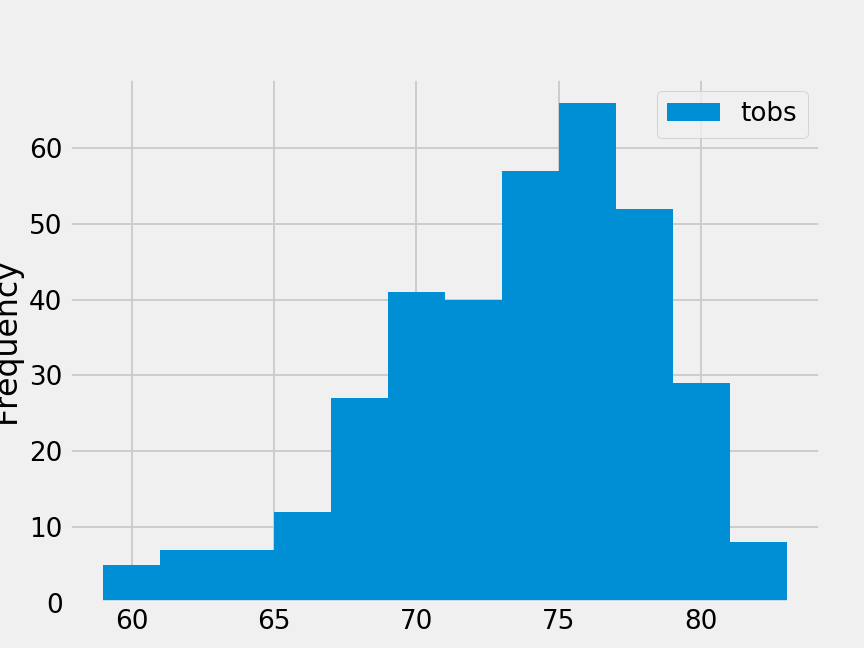

In [29]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(qry1)
df.plot.hist(bins=12)
plt.show()

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
qry = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date.between(oneyerago, last)).\
group_by(Measurement.date).filter(Measurement.station=='USC00519281').\
order_by(Measurement.date.desc()).all()
qry

[('2017-08-18', 0.06),
 ('2017-08-17', 0.01),
 ('2017-08-16', 0.12),
 ('2017-08-15', 0.32),
 ('2017-08-14', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.06),
 ('2017-08-04', 0.0),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.0),
 ('2017-07-29', 0.23),
 ('2017-07-28', 0.09),
 ('2017-07-27', 0.01),
 ('2017-07-26', 0.12),
 ('2017-07-25', 0.11),
 ('2017-07-24', 0.61),
 ('2017-07-23', 0.2),
 ('2017-07-22', 0.2),
 ('2017-07-21', 0.03),
 ('2017-07-20', 0.06),
 ('2017-07-19', 0.05),
 ('2017-07-18', 0.05),
 ('2017-07-17', 0.21),
 ('2017-07-16', 0.1),
 ('2017-07-15', 0.05),
 ('2017-07-14', 0.2),
 ('2017-07-13', 0.32),
 ('2017-07-12', 0.28),
 ('2017-07-11', 0.02),
 ('2017-07-10', 0.02),
 ('2017-07-09', 0.11),
 ('2017-07-08', 0.0),
 ('2017-07-07', 0.18),
 ('2017-07-06', 0.0),
 ('2017-07-05', 0.0),
 ('2017-07-04', 0.08),
 ('2017-07-03', 0.15),
 ('2017-07-02', 0.15),
 ('2017-07-01', 0.08),
 ('2017-06-30', 0.01),
 ('2017-06-29', 0.0),
 ('2017-06-28', 0.0),
 ('2017-06-27', 0.01),
 ('

In [31]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [37]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date,end_date=oneyerago,last
t=calc_temps(start_date, end_date)
t

[(58.0, 74.59058295964125, 87.0)]

<IPython.core.display.Javascript object>


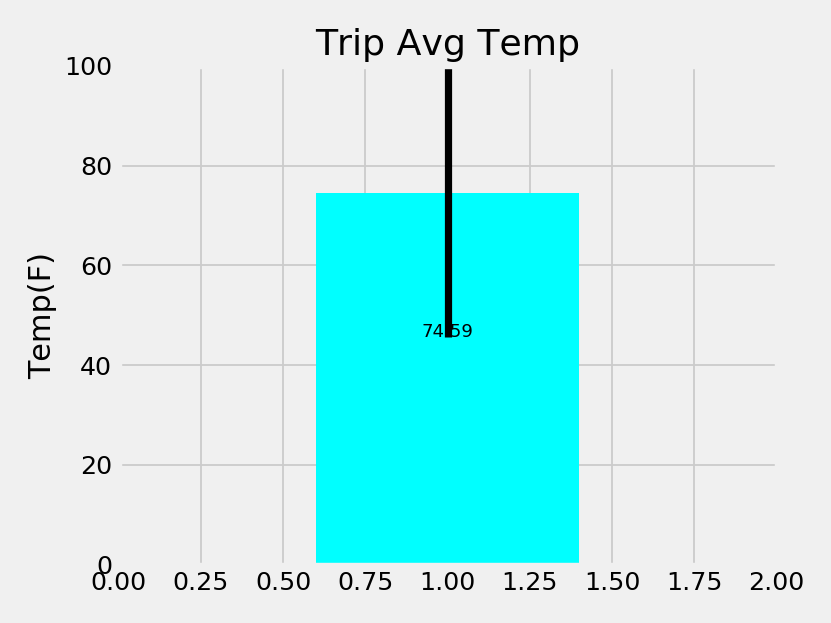

In [56]:
tmax=t[0][2]
tmin=t[0][0]
tavg=t[0][1]
yerr=tmax-tmin

# df = pd.DataFrame({'x':[" "], 'Temp':[tavg],'yerr':yerr})
# ax = df.plot.bar(x='x', y='Temp', rot=0)
# ax = df.plot.bar(x='x', y='yerr', rot=0)
# plt.show()

Temp = [tavg]
yerr = [yerr]
x = np.arange(len(Temp))
width2 = 0.35

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , Temp, color= 'cyan', yerr=yerr)
ax.set_xlabel("")
ax.set_ylabel("Temp(F)")
ax.set_title("Trip Avg Temp")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
    # label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0, 2)

fig.tight_layout()
fig.savefig("Temp.png")
plt.show()

In [707]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
query_station = session.query(
    Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,
    func.avg(Measurement.prcp)
).filter(Measurement.date >= oneyerago).filter(Measurement.date <= last).\
group_by(Measurement.station).\
order_by( func.count(Measurement.prcp).desc()).all()


query_station 




[('USC00519397',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.04481894150417864),
 ('USC00519281',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.19894886363636313),
 ('USC00513117',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.14142857142856985),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.45064024390243795),
 ('USC00519523',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.12105095541401249),
 ('USC00514830',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.12543396226415093),
 ('USC00517948',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.07649999999999993)]

In [708]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation





## Optional Challenge Assignment

In [709]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-02")

[(60.0, 69.39622641509433, 77.0)]

In [710]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
a=daily_normals("01-02")
a

[(60.0, 69.39622641509433, 77.0)]

In [719]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Plot the Results in a Matplotlib bar chart


<IPython.core.display.Javascript object>


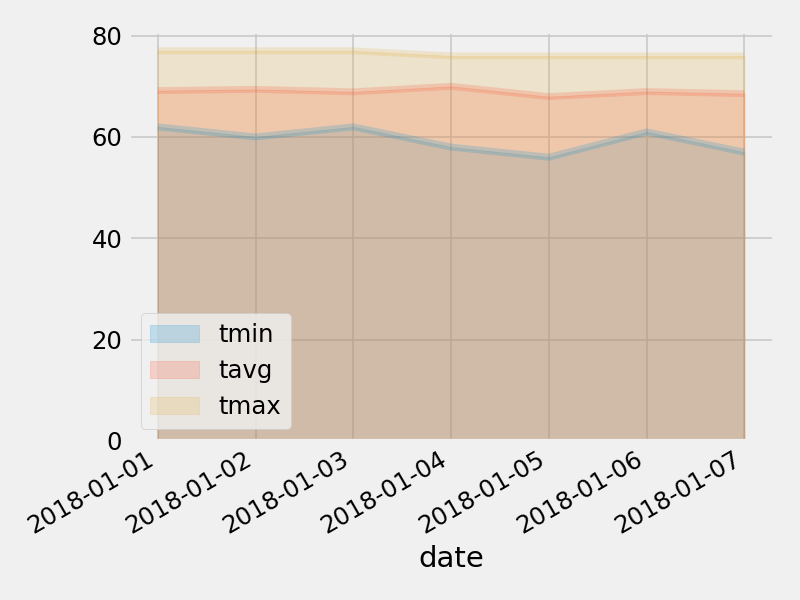

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
